In [2]:
#Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import sklearn.datasets as dta
import scipy.stats as st

In [3]:
#Set paths to CSVs
win_data = pd.read_csv("Cleaned_Data/NBA Team Wins for Salary.csv")
# salary_data15 = pd.read_csv("Cleaned_Data/salary2014-15.csv")
# salary_data16 = pd.read_csv("Cleaned_Data/salary2015-16.csv")
# salary_data17 = pd.read_csv("Cleaned_Data/salary2016-17.csv")
# salary_data18 = pd.read_csv("Cleaned_Data/salary2017-18.csv")
# salary_data19 = pd.read_csv("Cleaned_Data/salary2018-19.csv")
nba_team_names_df = pd.read_csv("Cleaned_Data/NBA Team Names and codes.csv")
salaries_combined = pd.read_csv("Cleaned_Data/Player_Salaries_Combined.csv")
salaries_combined.head()

,Player,Salary,Team,Team Code,Year
0,Stephen Curry,"$37,457,154",Golden State Warriors,GSW,2019
1,Russell Westbrook,"$35,665,000",Oklahoma City Thunder,OKC,2019
2,LeBron James,"$35,654,150",Los Angeles Lakers,LAL,2019
3,Chris Paul,"$35,654,150",Houston Rockets,HOU,2019
4,Kyle Lowry,"$32,700,000",Toronto Raptors,TOR,2019


In [4]:
#count of high paid players by team
players_per_team = salaries_combined["Team Code"].value_counts()
players_per_team.head()

MEM    10
MIA     9
LAC     8
OKC     8
CLE     7
Name: Team Code, dtype: int64

In [5]:
#add value counts as column in salaries_combined
ppt = players_per_team.to_dict()
salaries_combined['#Players Salary>20M'] = salaries_combined['Team Code'].map(ppt)
salaries_combined.head()

,Player,Salary,Team,Team Code,Year,#Players Salary>20M
0,Stephen Curry,"$37,457,154",Golden State Warriors,GSW,2019,5
1,Russell Westbrook,"$35,665,000",Oklahoma City Thunder,OKC,2019,8
2,LeBron James,"$35,654,150",Los Angeles Lakers,LAL,2019,4
3,Chris Paul,"$35,654,150",Houston Rockets,HOU,2019,7
4,Kyle Lowry,"$32,700,000",Toronto Raptors,TOR,2019,7


In [6]:
#add mean wins to win_data
meanwins = win_data.mean(axis=1) 
win_data["AVG Wins"] = meanwins
win_data.head()

,Team Code,2018-19,2017-18,2016-17,2015-16,2014-15,AVG Wins
0,ATL,29,24,43,48,60,40.8
1,BOS,49,55,53,48,40,49.0
2,BRK,42,28,20,21,38,29.8
3,CHI,22,27,41,42,50,36.4
4,CHO,39,36,36,48,33,38.4


In [7]:
#New df of players/team merged with team wins
new_sc = salaries_combined[["Team Code", '#Players Salary>20M']]
new_sc = new_sc.drop_duplicates()

merged_wins = win_data.merge(new_sc, left_on='Team Code', right_on='Team Code')
clean_merged_wins = merged_wins.drop(columns=['2018-19','2017-18','2016-17','2015-16','2014-15'])
clean_merged_wins.head()

,Team Code,AVG Wins,#Players Salary>20M
0,ATL,40.8,2
1,BOS,49.0,7
2,BRK,29.8,3
3,CHI,36.4,3
4,CHO,38.4,4


In [8]:
#add ratio column to clean_merged_wins
clean_merged_wins["Ratio of Wins to Players>20M"] = (clean_merged_wins["AVG Wins"]/clean_merged_wins["#Players Salary>20M"])
clean_merged_wins

,Team Code,AVG Wins,#Players Salary>20M,Ratio of Wins to Players>20M
0,ATL,40.8,2,20.400000
1,BOS,49.0,7,7.000000
2,BRK,29.8,3,9.933333
3,CHI,36.4,3,12.133333
4,CHO,38.4,4,9.600000
5,CLE,46.0,7,6.571429
6,DAL,36.4,5,7.280000
7,DEN,40.6,3,13.533333
8,DET,38.6,5,7.720000
9,GSW,64.4,5,12.880000


Text(0.5, 1.0, 'Wins:High Paid Players Ratio')

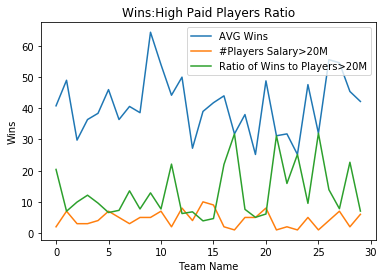

In [9]:
#line of ratio of avg wins to #players/team
ratio_chart = clean_merged_wins.plot(kind='line')
ratio_chart.set_ylabel('Wins')
ratio_chart.set_xlabel('Team Name')
ratio_chart.set_title('Wins:High Paid Players Ratio')

In [10]:
#High Paid Players as a bar chart
# players_per_team_chart = players_per_team.plot(kind='bar')
# players_per_team_chart.set_ylabel('Number of High Paid Players 2015-2019')
# players_per_team_chart.set_xlabel('Team Name')
# plt.show()

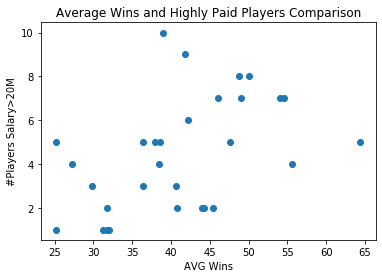

In [11]:
#scatter plot of high paid players/team

x_axis = clean_merged_wins["AVG Wins"]
y_axis = clean_merged_wins["#Players Salary>20M"]

plt.scatter(x_axis, y_axis)
plt.xlabel("AVG Wins") 
plt.ylabel("#Players Salary>20M")
plt.title("Average Wins and Highly Paid Players Comparison")
plt.show()

In [12]:
#Calculate the correlation coefficient between "AVG Wins" and "#Players Salary>20M"
print(f"The correlation coefficient between AVG Wins and #Players Salary>20M is {round(st.pearsonr(x_axis,y_axis)[0],2)}")

The correlation coefficient between AVG Wins and #Players Salary>20M is 0.46
